<a href="https://colab.research.google.com/github/camaradaneto/Data-Science-class/blob/master/Iris_Species_Segmentation_with_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First of all, lets import the proper libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [0]:
# Now, opening csv file

In [5]:
iris = pd.read_csv('iris-dataset.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
# And, then, plotting data choosing sepal columns

Text(0, 0.5, 'sepal_width')

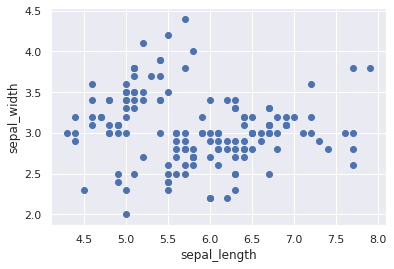

In [8]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [0]:
# Then, we shall get two clusters
# start by making a copy of dataset. then call 'kmeans' and insert a new column with clusters data in it.

In [15]:
x = iris.iloc[:,0:2]
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [14]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
identified_clusters = kmeans.fit_predict(x)

In [18]:
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [21]:
iris_clustered = x.copy()
iris_clustered['clusters'] = identified_clusters
iris_clustered.head()

,sepal_length,sepal_width,clusters
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Text(0, 0.5, 'width')

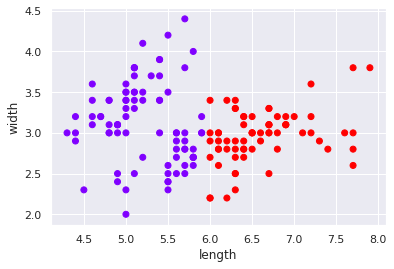

In [24]:
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris_clustered['clusters'], cmap='rainbow')
plt.xlabel('length')
plt.ylabel('width')

In [0]:
# It appears pyplot got only length axys for clustering, because its bigger. therefore, we shall standardize with preprocessing
from sklearn import preprocessing

# now, lets scale variables
x_scale = preprocessing.scale(iris)


In [30]:
# Creating two clusters scaled
kmeans = KMeans(2)
kmeans.fit(x_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# creating a copy so we can see original data with scaled 
x_clustered = iris.copy()
# adding Cluster column with predicted kmeans
x_clustered['cluster_pred'] = kmeans.fit_predict(x_scale)

In [32]:
x_clustered.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


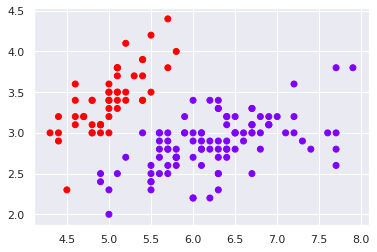

In [33]:
# Plotting Data
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=x_clustered['cluster_pred'], cmap='rainbow')

In [40]:
# taking the elbow method to define optmial number of clusters
wcss = []

for i in range (1,10):
  kmeans = KMeans (i)
  kmeans.fit(x_scale)
  wcss.append(kmeans.inertia_)
  
wcss

[600.0,
 223.73200573676345,
 141.15417813388652,
 114.57790500611007,
 91.06480287332292,
 81.74255429225724,
 72.40204936820271,
 63.24633294631212,
 54.30465635456595]

Text(0, 0.5, 'wcss')

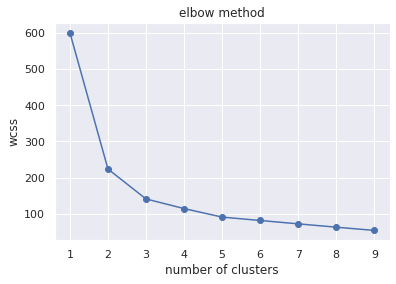

In [44]:
plt.plot(range(1,10), wcss, marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [45]:
# looks like 2, 3 or 4 clusters are good
# lets plot for 3 and 4 clusters to compare
kmeans3 = KMeans (3)
kmeans3.fit(x_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# lets standardize it
x3_scaled = kmeans3.fit_predict(x_scale)
x3_scaled

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [0]:
iris3 = iris.copy()
iris3['cluster_pred'] = x3_scaled

In [48]:
iris3.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


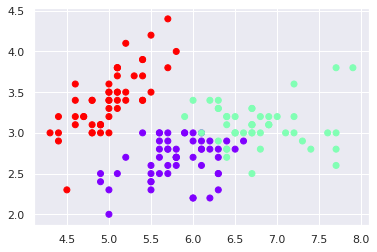

In [51]:
plt.scatter(iris3['sepal_length'], iris3['sepal_width'], c= iris3['cluster_pred'], cmap='rainbow')

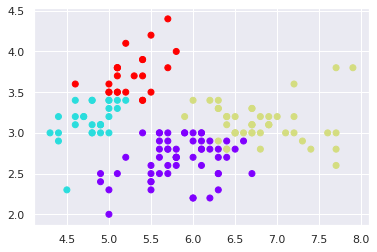

In [52]:
kmeans4 = KMeans (4)
kmeans4.fit(x_scale)
x4_scaled = kmeans4.fit_predict(x_scale)
x4_scaled
iris4 = iris.copy()
iris4['cluster_pred'] = x4_scaled
plt.scatter(iris4['sepal_length'], iris4['sepal_width'], c= iris4['cluster_pred'], cmap='rainbow')

In [0]:
# trying by petal clustering

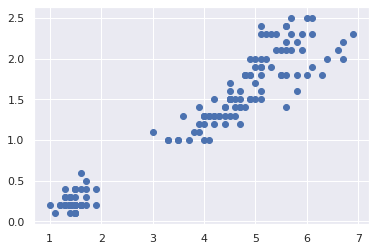

In [65]:
plt.scatter(iris['petal_length'], iris['petal_width'])

In [66]:
kmeansp = KMeans (3)
kmeansp.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
petal_cluster = iris.copy()
petal_cluster['cluster_pred'] = kmeansp.fit_predict(x)

In [71]:
petal_cluster.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


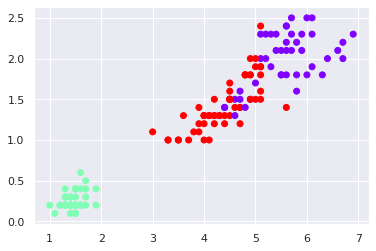

In [72]:
plt.scatter(iris['petal_length'], iris['petal_width'], c=petal_cluster['cluster_pred'], cmap='rainbow')

In [59]:
# compare to the real dataset
real_data = pd.read_csv('iris-with-answers.csv')
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:

real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Sepal clustering')

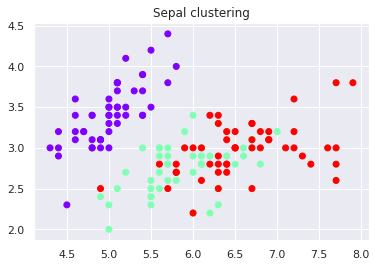

In [63]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.title('Sepal clustering')

Text(0.5, 1.0, 'petal clustering')

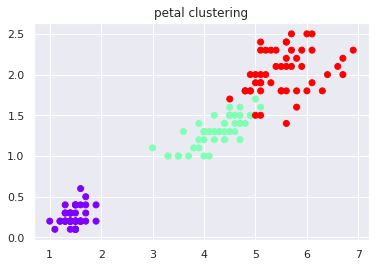

In [64]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.title('petal clustering')